# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ReedJ\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Here i am importing numpy, pandas, and pyplot.  

In [3]:
df1 = pd.read_csv('ratings.csv')
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Here i am loading and previewing the ratings data. 

In [4]:
df1.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

Above I am getting info about the data including the number of rows.  

In [5]:
df1['userId'].value_counts()[2]

29

Here I am performing a value counts analysis on User 2 in the userId field. Based on this, user 2 has watched 29 movies. 

Text(0, 0.5, 'Counts')

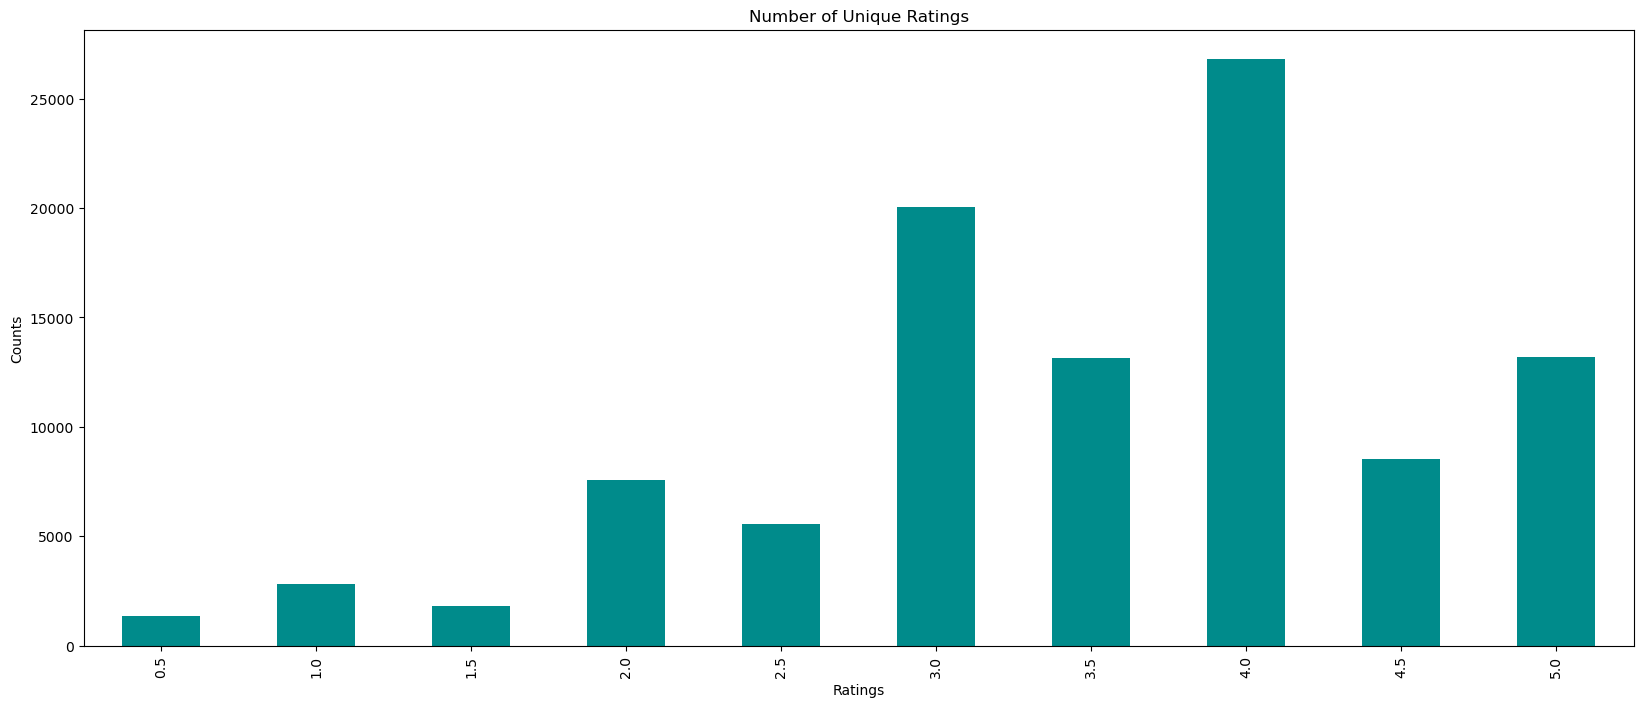

In [6]:
plt1 = df1['rating'].value_counts().sort_index().plot(kind = 'bar', figsize = (20,8), title = "Number of Unique Ratings", color = 'darkcyan')
plt1.set_xlabel("Ratings")
plt1.set_ylabel("Counts")

Above I am plotting a bar chart of the unique ratings within the ratings dataset.  I used the sort_index function to display the ratings in ascending order.  

The dataset is fairly light on movie reviews with a rating of less than 2.0.  The majority of the data is in the 3.0, 3.5, and 4.0 columns.  There is also a surprising amount of 5.0 movies.  

In [7]:
df2 = pd.read_csv('movies.csv')
df2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Here I create a new dataframe for the movies dataset.  

In [10]:
df3 = df1.merge (df2, on = 'movieId', how = 'outer')
df3.head(20)

,userId,movieId,rating,timestamp,title,genres
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18.0,1,3.5,1.455210e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19.0,1,4.0,9.657056e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21.0,1,3.5,1.407619e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27.0,1,3.0,9.626853e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31.0,1,5.0,8.504666e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Above I created a new dataframe and completed a full outer merge of the dataframes which contain the ratings and movies datasets.  The key value for the merge was the movieId column.  Now it is possible to view the rating and the movie title in the same dataframe.  

In [11]:
df4 = df3[df3['userId'] == 2.0]
df4.sort_values(by = ['rating'])

,userId,movieId,rating,timestamp,title,genres
97478,2.0,114060,2.0,1.445715e+09,The Drop (2014),Crime|Drama|Thriller
93998,2.0,91658,2.5,1.445715e+09,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller
8652,2.0,318,3.0,1.445715e+09,"Shawshank Redemption, The (1994)",Crime|Drama
96746,2.0,109487,3.0,1.445715e+09,Interstellar (2014),Sci-Fi|IMAX
91063,2.0,77455,3.0,1.445715e+09,Exit Through the Gift Shop (2010),Comedy|Documentary
90135,2.0,71535,3.0,1.445715e+09,Zombieland (2009),Action|Comedy|Horror
97675,2.0,115713,3.5,1.445715e+09,Ex Machina (2015),Drama|Sci-Fi|Thriller
76960,2.0,8798,3.5,1.445715e+09,Collateral (2004),Action|Crime|Drama|Thriller
95272,2.0,99114,3.5,1.445715e+09,Django Unchained (2012),Action|Drama|Western
93833,2.0,91529,3.5,1.445715e+09,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX


Above I created a another new dataframe with only User 2's movies filtered. I also sorted them in ascending order based on the review value.

Based on the reviews, user number 2's favorite movies include: Mad Max Fury Road, Inside Job, Warrior, Step Brothers, The Wolf of Wall Street, and The Jinx - The Life and Deaths of Robert Durst.  

In [12]:
from scipy.spatial.distance import euclidean

Here I imported euclidean from scipy.

In [13]:
wide = df1.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here I transformed the ratings into a wide format.  I used the data in DF1 because when I did the merge the userId column got converted to a float, which seemed to cause some minor issues during the sorting process earlier.  

In [14]:
cor = wide.T.corr()

Above I have performed the pandas Pearson correlation and a transpose function to the new wide dataframe and assigned them to the variable cor.   

In [15]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


Here I am previewing the head of the new data.  UserId is now on both axes.  

In [16]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

Above I am filtering and sorting the values so that I can see users that are similar to User 2.  The most similar via the Pearson Correlation are 341, 93, 143, and 148.  

In [17]:
wide.fillna(-1, inplace=True)

Here I have replaced the NA values in the wide dataframe with -1.  

In [18]:
from scipy.spatial.distance import pdist, squareform

Here I have imported pdist and squareform.  

In [19]:
euclidean_distances = squareform(pdist(wide, metric=euclidean))

Here I have performed the euclidian distance calculation on the wide dataframe.  

In [20]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

Here i have created a new dataframe to show the euclidian distance data.  

In [21]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


Here I am previewing the new euclidian distance data.  

In [22]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

Above I am filtering and sorting the values so that I can see users that are close to user 2 in terms of euclidian distance.  The most similar users via euclidian distance are 442, 461, and 189.  

In [23]:
cosine_distances = squareform(pdist(wide, metric='cosine'))

Here I have performed the cosine distance calculation on the wide dataframe.  

In [24]:
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)

Here I have created a new dataframe to show the cosine distance data.  

In [25]:
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

Above I am filtering and sorting the values so that I can see users that are close to user 2 in terms of cosine distance.  The most similar users via cosine distance are again 442, 461, and 189.  

In [29]:
df1['userId'].value_counts()[442]

20

In [30]:
df5 = df3[df3['userId'] == 442.0]
df5.sort_values(by = ['rating']).head(20)

,userId,movieId,rating,timestamp,title,genres
34013,442.0,1644,0.5,1.331561e+09,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller
53830,442.0,3386,0.5,1.331561e+09,JFK (1991),Drama|Mystery|Thriller
51646,442.0,3107,0.5,1.331560e+09,Backdraft (1991),Action|Drama
49023,442.0,2881,0.5,1.331561e+09,Double Jeopardy (1999),Action|Crime|Drama|Thriller
57814,442.0,3863,0.5,1.331561e+09,"Cell, The (2000)",Drama|Horror|Thriller
28795,442.0,1272,0.5,1.331560e+09,Patton (1970),Drama|War
55013,442.0,3510,1.0,1.331560e+09,Frequency (2000),Drama|Thriller
38466,442.0,2020,1.0,1.331561e+09,Dangerous Liaisons (1988),Drama|Romance
24436,442.0,1186,1.0,1.331561e+09,"Sex, Lies, and Videotape (1989)",Drama
17168,442.0,610,1.0,1.331561e+09,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


Above I have performed the same filtering and sorting for User 442 that I used for User 2 above.  

Based on the overall low ratings of user 442 I dont think that its reasonable to use their data to make any reccomendations to User 2.  Therefore lets move to the next most similar user.

In [37]:
df1['userId'].value_counts()[461]

27

In [38]:
df5 = df3[df3['userId'] == 461.0]
df5.sort_values(by = ['rating'], ascending = False).head(20)

,userId,movieId,rating,timestamp,title,genres
96426,461.0,106782,5.0,1.505935e+09,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
10263,461.0,356,5.0,1.505935e+09,Forrest Gump (1994),Comedy|Drama|Romance|War
8896,461.0,318,4.5,1.505935e+09,"Shawshank Redemption, The (1994)",Crime|Drama
95327,461.0,99114,4.5,1.505935e+09,Django Unchained (2012),Action|Drama|Western
35698,461.0,1784,4.5,1.505935e+09,As Good as It Gets (1997),Comedy|Drama|Romance
27600,461.0,1246,4.5,1.505935e+09,Dead Poets Society (1989),Drama
26197,461.0,1213,4.0,1.505935e+09,Goodfellas (1990),Crime|Drama
90749,461.0,74458,4.0,1.505935e+09,Shutter Island (2010),Drama|Mystery|Thriller
51949,461.0,3147,4.0,1.505935e+09,"Green Mile, The (1999)",Crime|Drama
47816,461.0,2762,4.0,1.505935e+09,"Sixth Sense, The (1999)",Drama|Horror|Mystery


User 461 has higher overall ratings similar User 2.  They also have low euclidian and cosine distances to user 2.  Therefore, I'd reccomend the following movies to User 2 based on User 461's profile:  The Wolf of Wall St, Forrest Gump, The Shawshank Redemption, and Django Unchained. 

# Analysis/Summary

The initial suggestions for user 2 based on users 442 did not make sense.  User 442 had low overall ratings for all their movies while user 2 had high ratings.  This suggests personality and preference differences between user 442 and user 2.  In addition, the high rated movies for user 442 included Tootsie and The Jungle Book, which are considered family friendly.  In contrast, user 2’s highly rated movies included The Wolf of Wall Street and Warrior which are intended for adult audiences.  It is for these reasons that I decided to recommend based on user 189’s profile.  

The cosine and euclidian distance calculations arrived at the same answer for the users most similar to user 2: 442, 461, 189, and 508.  The Pearson Correlation suggested an entirely different group of users.  Due to the strong agreement between euclidian and cosine distance rankings for users, I decided to use the results from those models.  

Reed Johnson 2/25/24